# 1. Air Passenger (real world dataset)

Description:
The AirPassenger dataset provides monthly totals of a US airline passengers, from 1949 to 1960.
this dataset has two columns: Month and number of passengers

## 1.1 Setting Up The Dataset and Descriptive Statistics

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [151]:
air_passenger_df = pd.read_csv("AirPassengers.csv")

In [152]:
print(air_passenger_df)
print(air_passenger_df.info())

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [153]:
air_passenger_df['Date'] = pd.to_datetime(air_passenger_df['Month'])
air_passenger_df = air_passenger_df.drop(columns = 'Month')
air_passenger_df = air_passenger_df.set_index('Date')
air_passenger_df = air_passenger_df.rename(columns = {'#Passengers':'Passengers'})
air_passenger_df.dropna(inplace=True)

In [154]:
print(air_passenger_df.head())
print(air_passenger_df.describe())

            Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


## 1.2 Rolling Statistics & Checking Stationarity

In [155]:
def test_stationarity(timeseries,xlabel,ylabel):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()
    
        #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='cornflowerblue',label='Original')
    mean = plt.plot(MA, color='firebrick', label='Rolling Mean')
    std = plt.plot(MSTD, color='limegreen', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel(xlabel, size = 12)
    plt.ylabel(ylabel, size  = 12)
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

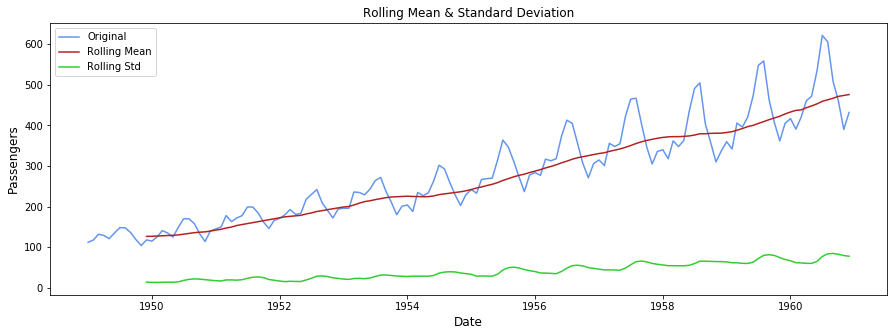

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [156]:
test_stationarity(air_passenger_df['Passengers'],'Date','Passengers')

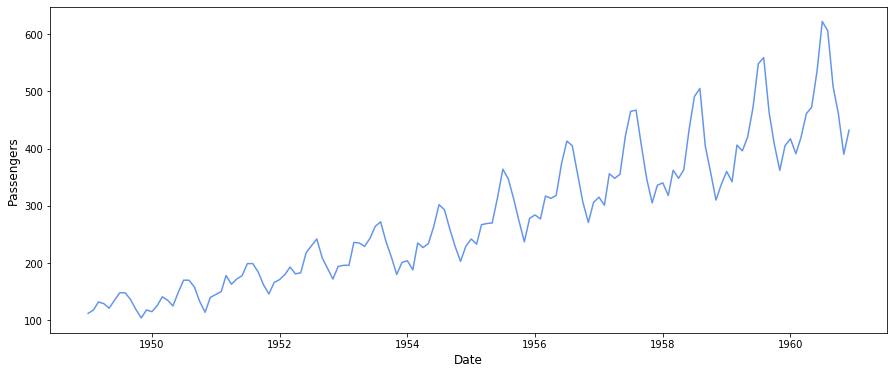

In [157]:
plt.plot(air_passenger_df['Passengers'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Passengers', size = 12)
plt.show()

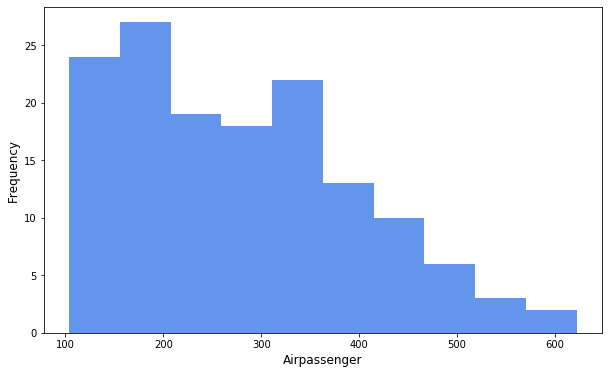

In [158]:
plt.figure(figsize = (10,6))
plt.hist(air_passenger_df['Passengers'], color = 'cornflowerblue')
plt.xlabel('Airpassenger', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

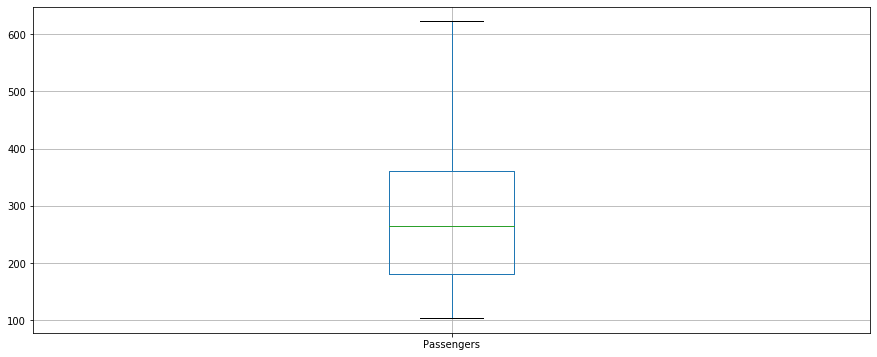

In [159]:
boxplot = air_passenger_df.boxplot(column=['Passengers'])
boxplot.plot()

plt.show()

## 1.3 ACF & PACF

In [160]:
import statsmodels.graphics.tsaplots as st

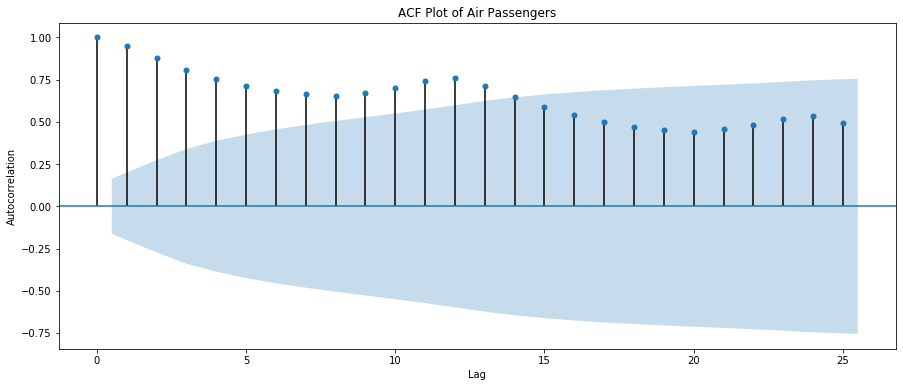

In [161]:
# ACF Plot for air passengers - 25
st.plot_acf(air_passenger_df['Passengers'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

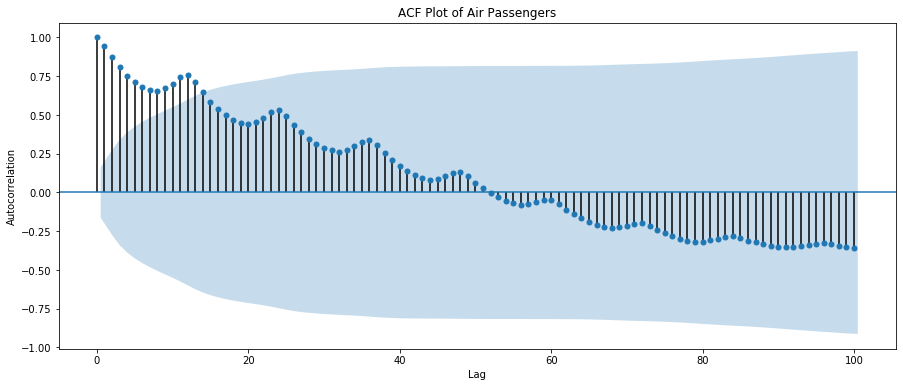

In [162]:
# ACF Plot for air passengers - 100
st.plot_acf(air_passenger_df['Passengers'], lags = 100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

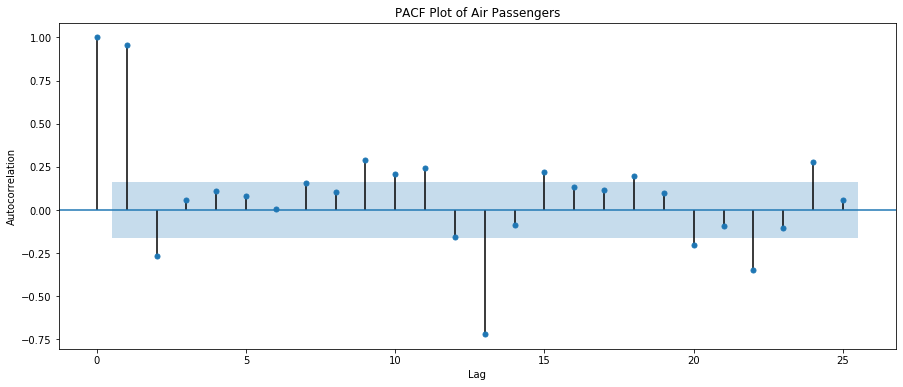

In [163]:
# PACF Plot for air passengers - 25
st.plot_pacf(air_passenger_df['Passengers'], lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

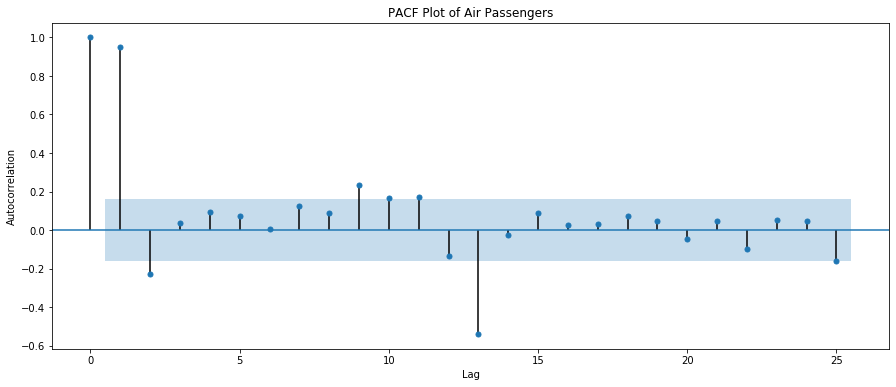

In [164]:
# PACF Plot for air passengers - 25 ywmle
st.plot_pacf(air_passenger_df['Passengers'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

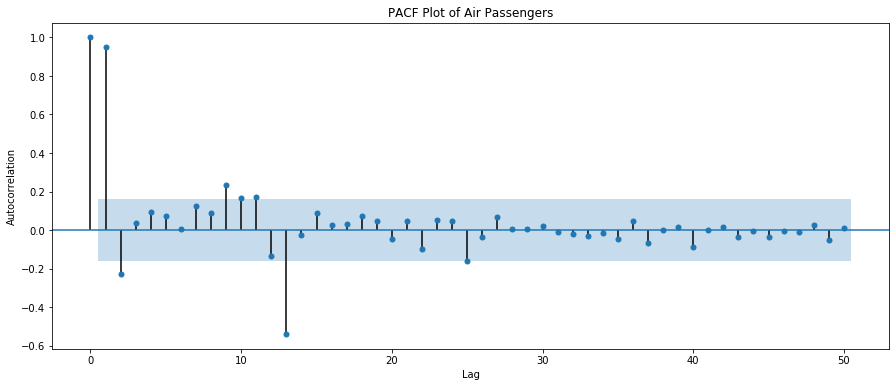

In [165]:
# PACF Plot for air passengers - 100 ywmle
st.plot_pacf(air_passenger_df['Passengers'], method='ywmle', lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

## 1.4 AR model

Text(0.5, 1.0, 'RSS: 1.5023')

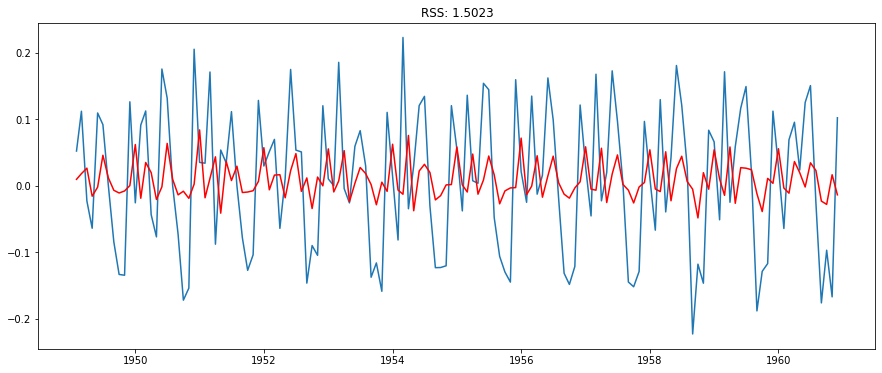

In [166]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## 1.5 MA model

Text(0.5, 1.0, 'RSS: 1.4721')

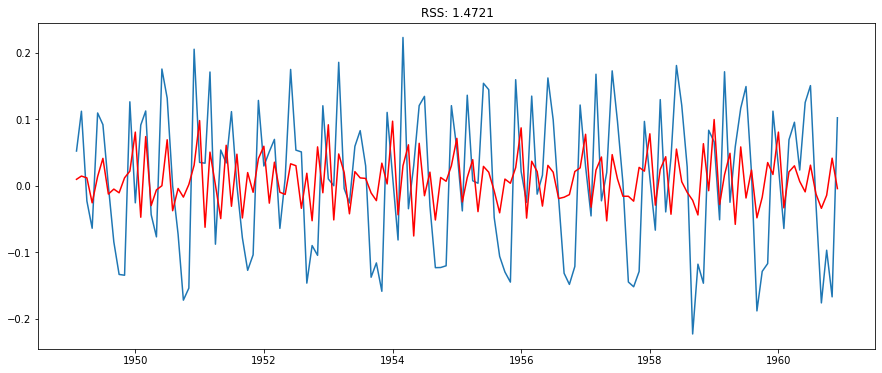

In [167]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### forecasting

In [168]:
import math

a=len(air_passenger_df)
train_len = math.ceil(0.8*a)
train = air_passenger_df[0:train_len] # first 80% of data months as training set
test = air_passenger_df[train_len:] # last 20% of data
y = air_passenger_df.copy()
ma_window = 12
y['predict'] = air_passenger_df['Passengers'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean


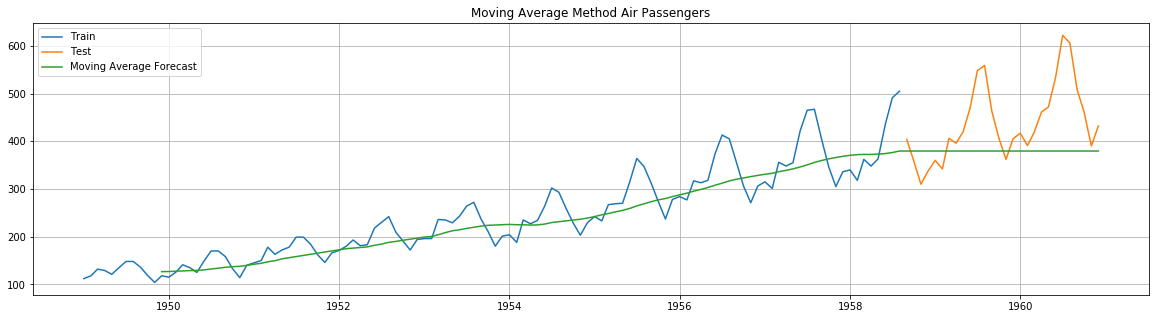

In [169]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['Passengers'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Air Passengers')
plt.show()

## 1.6 ARIMA model

Text(0.5, 1.0, 'RSS: 1.0292')

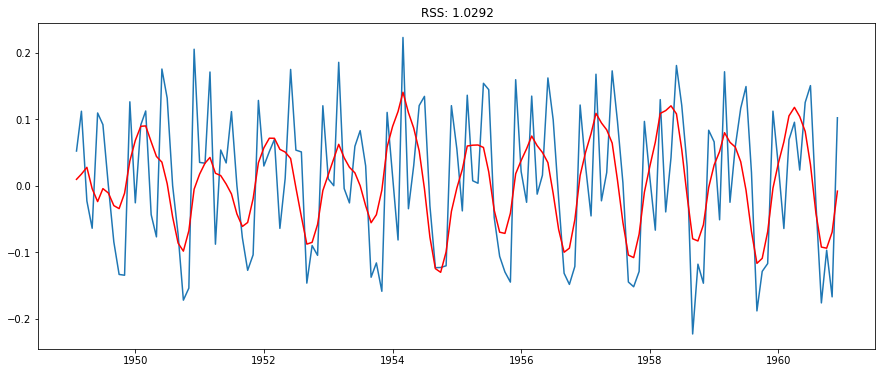

In [170]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [171]:
# Develop an IMA(1,1) model for the data
# model = ARIMA(m1_df.Measurement, order=(0,1,1))
# model_fit = model.fit()

# Find the best ARIMA model for air passenger dataset
# Set range of p,d from 0 to 3 and d from 0 to 2. Will try more later. 
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[0,1,2]
qlist=[0,1,2,3]
pdq=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            try: 
                best_model=ARIMA(air_passenger_df['Passengers'], order=(p, d, q))
                best_model_fit=best_model.fit(disp=False)
                pdq.append([p,d,q])
                aic.append(best_model_fit.aic)
                bic.append(best_model_fit.bic)
            except:
                continue

min_aic = min(aic)
min_bic = min(bic)
index_aic = aic.index(min_aic)
index_bic = bic.index(min_bic)

print('The smallest AIC is ',min_aic)  
print('The smallest BIC is ',min_bic)  
print('According to AIC, the best choice of parameters [p,d,q] is ',pdq[index_aic])
print('According to BIC, the best choice of parameters [p,d,q] is ',pdq[index_bic])

# summary of fit model
#print(best_model_fit.summary())

The smallest AIC is  1336.7756157481379
The smallest BIC is  1360.478372790217
According to AIC, the best choice of parameters [p,d,q] is  [3, 1, 3]
According to BIC, the best choice of parameters [p,d,q] is  [3, 1, 3]


## 1.7 SARIMAX 

In [172]:
air_df = pd.read_csv("AirPassengers.csv", names = ["Month", "Passengers"], header=0)

In [173]:
def mov_avg(series, period):
    s=pd.Series(index=series.index, dtype=np.double)
    for i in range(period-1, len(series)): #create the loop situation
        s[i]=(series[i-period+1 : i+1]).mean()       
    return s

In [174]:
per_12=mov_avg(air_df.Passengers, 12)

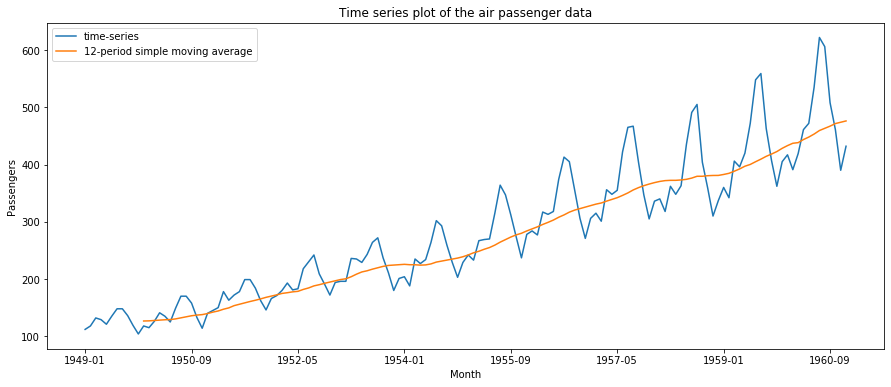

In [175]:
plt.figure()
plt.title('Time series plot of the air passenger data')
plt.plot(air_df.Month,air_df.Passengers, label='time-series')
plt.plot(air_df.Month, per_12, label='12-period simple moving average')
plt.xticks(np.arange(0, len(air_df)+1, 20))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [176]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(air_df.Passengers.iloc[0:100], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                        except:
                            continue

In [177]:
min_aic=min(aic)
index_aic=aic.index(min_aic)
print('min aic is', min_aic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])

min aic is 641.7824661840992
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [0, 1, 3, 1, 1, 2]


In [178]:
best_model_air=SARIMAX(air_df.Passengers.iloc[0:100], order=(0, 1, 3), seasonal_order=(1, 1, 2, 12)).fit(disp=False)
best_model_air.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  100
Model:             SARIMAX(0, 1, 3)x(1, 1, 2, 12)   Log Likelihood                -313.891
Date:                            Fri, 12 Nov 2021   AIC                            641.782
Time:                                    17:15:15   BIC                            659.044
Sample:                                         0   HQIC                           648.733
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3355      0.110     -3.061      0.002      -0.550      -0.121
ma.L2          0.0776      0.145      0.534      0.593      -0.207       0.362
ma.L3         -0.2365      0.157     -1.509      0.131      -0.544       0.071
ar.S.L12       0.9986      0.363      2.755      0.006       0.288       1.709
ma.S.L12      -1.4685      5.271     -0.279      0.781     -11.799       8.862
ma.S.L24       0.4913      2.406      0.204      0.838      -4.223       5.206
sigma2        63.4714    313.851      0.202      0.840    -551.664     678.607
===================================================================================
Ljung-Box (Q):                       30.16   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               1.38   Skew:                             0.40
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### forecasting

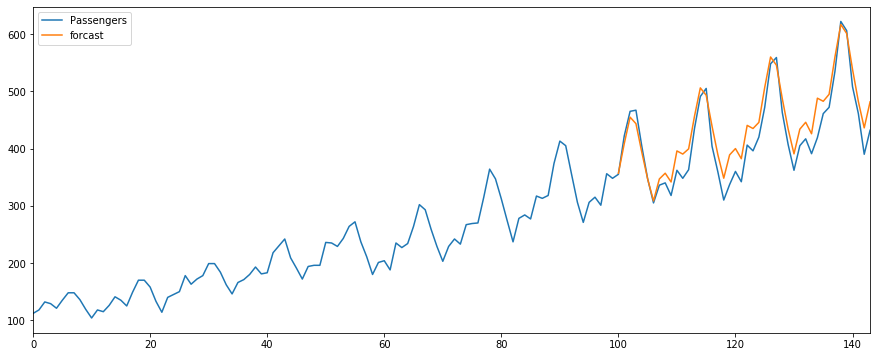

In [179]:
air_df['forcast']=best_model_air.forecast(44)
air_df['forcast'][100:]
air_df[['Passengers','forcast']].plot()

In [180]:
from sklearn.metrics import mean_absolute_error as mae
mae(air_df['Passengers'][100:], air_df['forcast'][100:])

25.88251074335228

# 2. Electric Product (real world dataset)

Description:
The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.
Here, we mainly use the column 'date' and the production 'IPG2211A2N' to do time series analysis.
This dataset has two columns: Date and number PIG2211A2N

# 2.1 Setting Up The Dataset and Descriptive Statistics

In [181]:
electric_df = pd.read_csv("Electric_Production.csv")

In [182]:
print(electric_df)
print(electric_df.info())

          DATE  IPG2211A2N
0     1/1/1985     72.5052
1     2/1/1985     70.6720
2     3/1/1985     62.4502
3     4/1/1985     57.4714
4     5/1/1985     55.3151
..         ...         ...
392   9/1/2017     98.6154
393  10/1/2017     93.6137
394  11/1/2017     97.3359
395  12/1/2017    114.7212
396   1/1/2018    129.4048

[397 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE          397 non-null object
IPG2211A2N    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


In [183]:
electric_df['Date'] = pd.to_datetime(electric_df['DATE'])
electric_df = electric_df.drop(columns = 'DATE')
electric_df = electric_df.set_index('Date')
electric_df = electric_df.rename(columns = {'IPG2211A2N':'value'})
electric_df.dropna(inplace=True)

In [184]:
print(electric_df.head())
print(electric_df.describe())

              value
Date               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151
            value
count  397.000000
mean    88.847218
std     15.387834
min     55.315100
25%     77.105200
50%     89.779500
75%    100.524400
max    129.404800


# 2.2 Rolling Statistics & Checking Stationarity

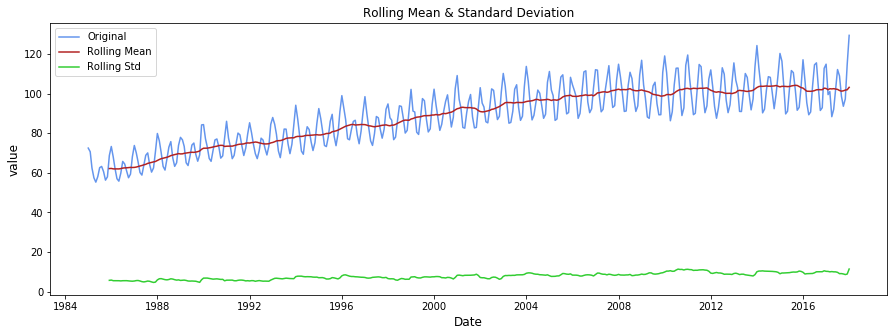

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [185]:
test_stationarity(electric_df['value'],'Date','value')

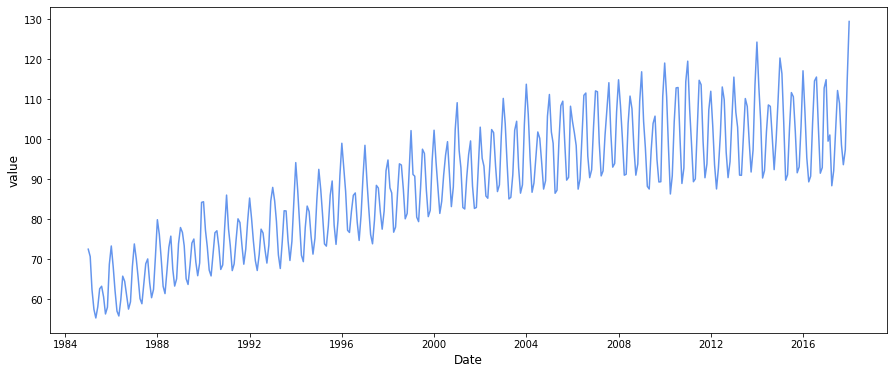

In [186]:
plt.plot(electric_df['value'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('value', size = 12)
plt.show()

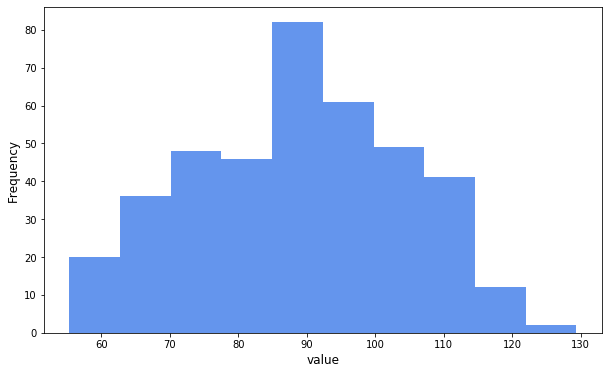

In [187]:
plt.figure(figsize = (10,6))
plt.hist(electric_df['value'], color = 'cornflowerblue')
plt.xlabel('value', size = 12)
plt.ylabel('Frequency', size = 12)
plt.show()

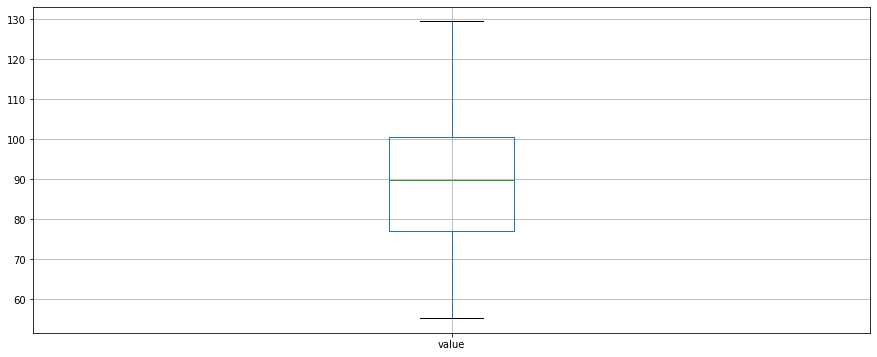

In [188]:
boxplot = electric_df.boxplot(column=['value'])
boxplot.plot()

plt.show()